In [1]:
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
%matplotlib inline

Terdapat suatu sistem penggajian sales dari perusahaan distributor. Gaji sales akan mengalami peningkatan dengan dua syarat yaitu rajin masuk kantor (jumlah absen tiap bulan minimal), dan total penjualan yang dihasilkan pada tiap bulan. Buatlah code untuk sistem penggajian ini dengan menggunakan sistem inferensi fuzzy mamdani, berdasarkan beberapa kriteria berikut ini:

    * variable kehadiran (jumlah absen dalam tiap bulan, di mana satu bulan = 20 hari kerja) yang memiliki tiga buah himpunan fuzzy, yaitu rajin, sedang, dan malas.
    * Variable jumlah Penjualan yang memiliki dua buah himpunan fuzzy, yaitu sedikit dan banyak.
    * Terdapat tiga jenis output kenaikan gaji, yaitu rendah, sedang, dan tinggi. Kneaikan ini berkisar antara 0 sampai dengan 15% dari gaji awal.
    * Berikut aturan untuk kenaikan gaji:
        1. Jika kehadiaran adalah rajin dan jumlah penjualan adalah banyak, maka kenaikan gaji adalah tinggi
        2. Jika kehadiran sedang dan jumlah penjualan banyak, maka kenaikan gaji adalah sedang
        3. Jika kehadiaran malas dan jumlah penjualan sedikit maka kenaikan gaji adalah rendah
        4. jika kehadiran malas dan jumlah penjualan banyak maka kenaikan gaji adalah sedang

### Fuzzyfikasi

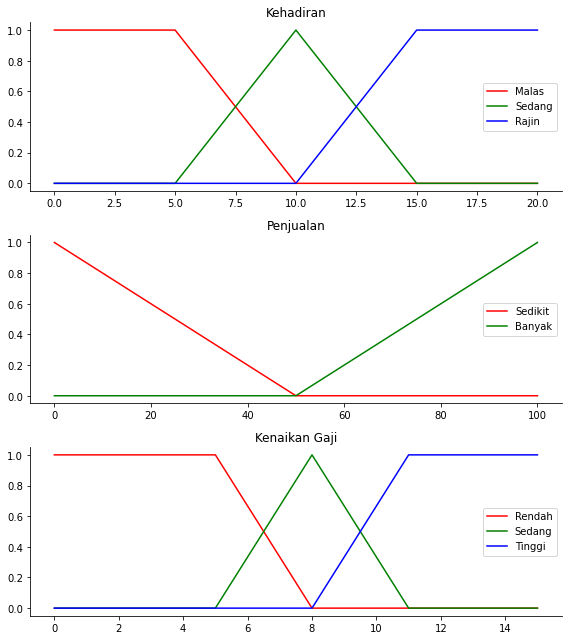

In [4]:

# Input Variable Himpunan Kehadiran
hadir = np.arange(0, 21) # inputnya berdasarkan hari

# Input Variable Himpunan Penjualan
jual = np.arange(0, 101) # inputnya berdasar jumlah penjualan

# Output Variable Himpunan Kenaikan Gaji
gaji = np.arange(0, 16) # outputnya dalam  persentase kenaikan gaji

# generate fungsi keanggotaan
hadir_malas = fuzzy.trapmf(hadir, [0, 0, 5, 10])
hadir_sedang = fuzzy.trimf(hadir, [5, 10, 15])
hadir_rajin = fuzzy.trapmf(hadir, [10, 15, 20, 20])
jual_sedikit = fuzzy.trimf(jual, [0, 0, 50])
jual_banyak = fuzzy.trimf(jual, [50, 100, 100])
gaji_rendah = fuzzy.trapmf(gaji, [0, 0, 5, 8])
gaji_sedang = fuzzy.trimf(gaji, [5, 8, 11])
gaji_tinggi = fuzzy.trapmf(gaji, [8, 11, 15, 15])


# visualisasi 
fig, (in1, in2, out) = plt.subplots(nrows=3, figsize=(8, 9))

in1.plot(hadir,hadir_malas,'r',label='Malas')
in1.plot(hadir,hadir_sedang,'g',label='Sedang')
in1.plot(hadir,hadir_rajin,'b',label='Rajin')
in1.set_title("Kehadiran")
in1.legend()

in2.plot(jual,jual_sedikit,'r',label='Sedikit')
in2.plot(jual,jual_banyak,'g',label='Banyak')
in2.set_title("Penjualan")
in2.legend()

out.plot(gaji,gaji_rendah,'r',label='Rendah')
out.plot(gaji,gaji_sedang,'g',label='Sedang')
out.plot(gaji,gaji_tinggi,'b',label='Tinggi')
out.set_title("Kenaikan Gaji")
out.legend()

# Turn off top/right axes
for ax in (in1, in2, out):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()


### Aturan Fuzzy

In [5]:
# kehadiran
data_hadir = 8

# penjualan
data_jual = 10

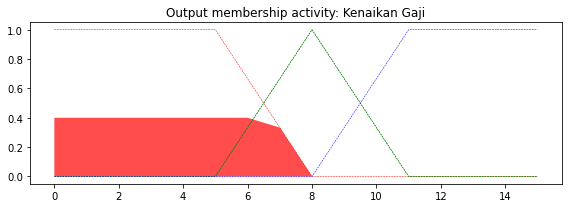

In [6]:
# mengetahui MF dari permisalan data
hadir_level_malas = fuzzy.interp_membership(hadir, hadir_malas, data_hadir)
hadir_level_sedang = fuzzy.interp_membership(hadir, hadir_sedang, data_hadir)
hadir_level_rajin = fuzzy.interp_membership(hadir, hadir_rajin, data_hadir)

jual_level_sedikit = fuzzy.interp_membership(jual, jual_sedikit, data_jual)
jual_level_banyak = fuzzy.interp_membership(jual, jual_banyak, data_jual)

# anticedent
active_rule1 = np.fmin (hadir_level_rajin, jual_level_banyak)
active_rule2 = np.fmin (hadir_level_sedang, jual_level_banyak)
active_rule3 = np.fmin (hadir_level_malas, jual_level_sedikit)
active_rule4 = np.fmin (hadir_level_malas, jual_level_banyak)

# Operasi antara anticedent dengan consecuent
R1 = np.fmin(active_rule1, gaji_tinggi)
R2 = np.fmin(active_rule2, gaji_sedang)
R3 = np.fmin(active_rule3, gaji_rendah)
R4 = np.fmin(active_rule4, gaji_sedang)

gaji0 = np.zeros_like(gaji)

# visualisasi
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(gaji, gaji0, R3, facecolor='r', alpha=0.7)
ax0.plot(gaji, gaji_rendah, 'r', linewidth=0.5, linestyle='--', )
ax0.fill_between(gaji, gaji0, R2, facecolor='g', alpha=0.7)
ax0.plot(gaji, gaji_sedang, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(gaji, gaji0, R4, facecolor='g', alpha=0.7)
ax0.plot(gaji, gaji_sedang, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(gaji, gaji0, R1, facecolor='b', alpha=0.7)
ax0.plot(gaji, gaji_tinggi, 'b', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity: Kenaikan Gaji')

# Turn off top/right axes
# for ax in (ax0,):
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.get_xaxis().tick_bottom()
#     ax.get_yaxis().tick_left()

plt.tight_layout()

### Aggregated Output

In [7]:
aggregated = np.fmax(R1, np.fmax(R2, np.fmax(R3, R4)))
aggregated

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.33333333, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

### Defuzzyfication

In [8]:
output = fuzzy.defuzz(gaji, aggregated, 'centroid')
result = round(output,2)

print("Kenaikan Gaji = " + str(result) + "%")

Kenaikan Gaji = 3.68%
